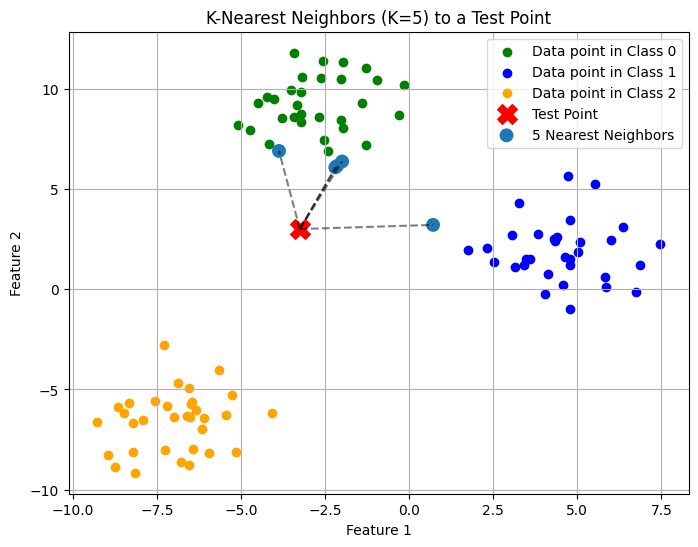

The test_point  [[-3.25  3.  ]]  belongs to class  [0]


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, Y = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.5)
# X are the data points (instances) (feature1, feature2)
# Y are the labels for each of the point in X

# Train a KNN model (using all data for simplicity in this visualization)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)

# 3. Select a test point
test_point = [-3.25, 3]
#test_point = [0,-1]
test_point = np.array(test_point).reshape(1, -1)

# 4. Find K-nearest neighbors
distances, indices = knn.kneighbors(test_point)
nearest_neighbors = X[indices[0]]

# Find the predicted lable (class) for the test point
y_pred = knn.predict(test_point)

# 5. Plotting
plt.figure(figsize=(8, 6))
#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', label='All Data Points')
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='green', label='Data point in Class 0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Data point in Class 1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], color='orange', label='Data point in Class 2')

plt.scatter(test_point[:, 0], test_point[:, 1], color='red', marker='X', s=200, label='Test Point')
plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], marker='o', s=100, edgecolor='none', label=f'{k} Nearest Neighbors')

# Optional: Draw lines from test point to neighbors
for neighbor in nearest_neighbors:
    plt.plot([test_point[0, 0], neighbor[0]], [test_point[0, 1], neighbor[1]], 'k--', alpha=0.5)

plt.title(f'K-Nearest Neighbors (K={k}) to a Test Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("The test_point ",test_point, " belongs to class ",y_pred)